Is there any difference between weekend and weekdays?

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('training.csv')

In [8]:
# Classify day types based on holiday and weekday
def classify_day_type(row):
    if row['weekday'] == 1 and row['holiday'] == 1:
        return 'Holiday (Weekday)'  # Public holidays on weekdays
    elif row['weekday'] == 0 and row['holiday'] == 1:
        return 'Holiday (Weekend)'  # Public holidays on weekends
    elif row['weekday'] == 1 and row['holiday'] == 0:
        return 'Weekday' # Regular weekdays
    elif row['weekday'] == 0 and row['holiday'] == 0:
        return 'Weekend'  # Non-holiday weekends

day_type
Holiday (Weekday)      9
Weekday              163
Weekend              116
dtype: int64


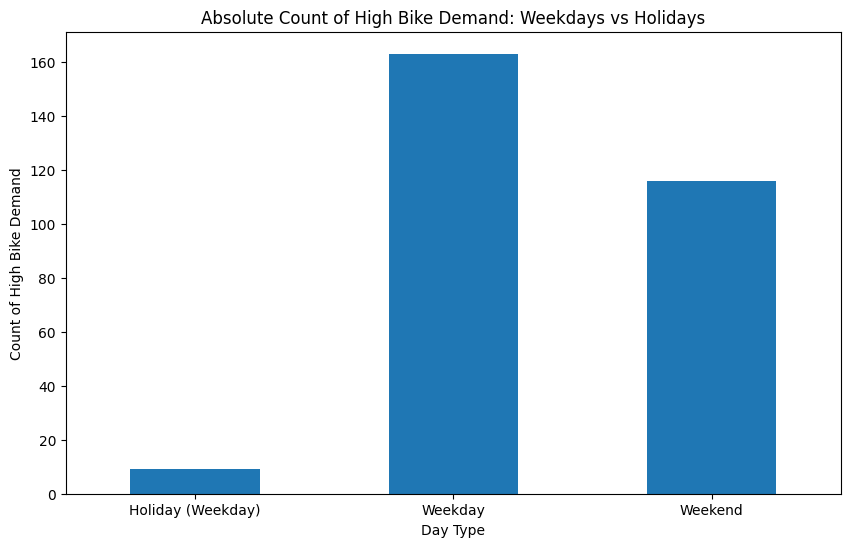

In [9]:
# Apply the classification to create a new column 'day_type'
df['day_type'] = df.apply(classify_day_type, axis=1)

# Filter the data to only include high bike demand instances
high_demand_df = df[df['increase_stock'] == 'high_bike_demand']

# Count the number of high bike demand instances in each category
demand_counts = high_demand_df.groupby('day_type').size()

# Print the counts for verification
print(demand_counts)

# Plot the counts as a bar plot (absolute values)
demand_counts.plot(kind='bar', figsize=(10,6))

# Customize the plot
plt.title('Absolute Count of High Bike Demand: Weekdays vs Holidays')
plt.xlabel('Day Type')
plt.ylabel('Count of High Bike Demand')
plt.xticks(rotation=0)
plt.show()